## Dev for lecture 20

In [1]:
## Import packages
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
## Data accessed at http://www.tylervigen.com/spurious-correlations

years = np.arange(2000,2010)
cheese = np.array([9.3, 9.7, 9.7, 9.7, 9.9, 10.2, 10.5, 11, 10.6, 10.6])
degrees = np.array([480, 501, 540, 552, 547, 622, 655, 701, 712, 708])

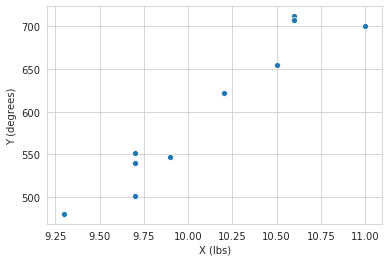

In [3]:
sns.scatterplot(cheese, degrees)
plt.xlabel("X (lbs)")
plt.ylabel("Y (degrees)");
plt.savefig("Lecture20_cheese_degrees_scatter.pdf")

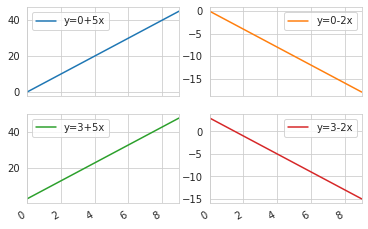

In [4]:
## Make a series of lines
x_axis = np.arange(10)

y_1 = 0 + 5*x_axis
y_2 = 0 - 2*x_axis
y_3 = 3 + 5*x_axis
y_4 = 3 - 2*x_axis

y_df = pd.DataFrame({"y=0+5x":y_1, "y=0-2x":y_2, "y=3+5x":y_3, "y=3-2x":y_4})

y_df.plot(subplots=True, sharex=True, layout=(2,2));
plt.savefig("Lecture20_lines.pdf")


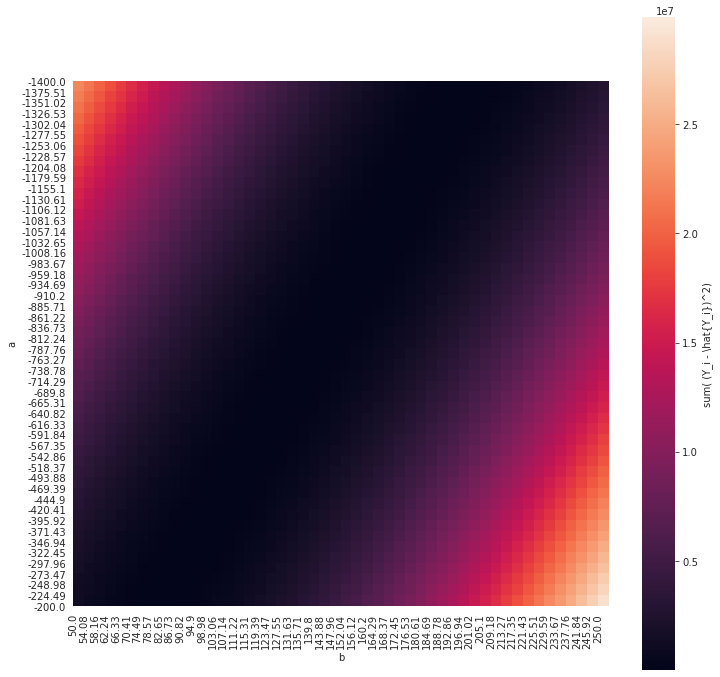

In [5]:
## Create heatmap of checking different values for slope (b) and intercept (a)
from matplotlib.ticker import FormatStrFormatter

a_tries = np.linspace(-1400, -200)
b_tries = np.linspace(50,250)

# Loop through a and b possibilities and evaluate sum of squared error
error_array = np.zeros((50,50))
for i,a_i in enumerate(a_tries):
    for j,b_j in enumerate(b_tries):
        # Calculate predicted values
        y_hat_array = a_i + b_j*cheese
        
        # Calculate squared error
        sum_sq_error = np.sum((y_hat_array - degrees)**2)
        error_array[i,j] = sum_sq_error
        
plt.figure(figsize=(12,12))
sns.heatmap(error_array, cbar_kws={'label': 'sum( (Y_i - \hat{Y_i})^2)'})
ax = plt.gca()
plt.xticks(ticks = np.arange(50), labels = [str(round(float(label), 2)) for label in b_tries]);
plt.yticks(ticks = np.arange(50), labels = [str(round(float(label), 2)) for label in a_tries]);
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("b")
plt.ylabel("a")
ax.set_aspect("equal")
plt.savefig("Lecture20_heatmap_ex.pdf")

In [6]:
## Actually compute line of best fit by hand

x_mean = np.mean(cheese)
y_mean = np.mean(degrees)

b = (np.sum((cheese - x_mean)*(degrees - y_mean)))/(np.sum((cheese - x_mean)**2))
a = y_mean - b*x_mean

print(b,a)

157.1092564491654 -988.1456752655538


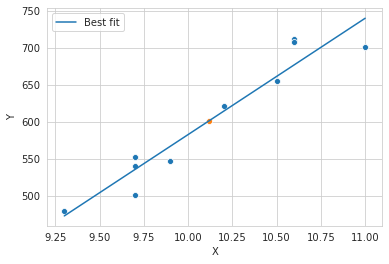

In [7]:
sns.scatterplot(cheese, degrees)
sns.lineplot(cheese, a+b*cheese, label="Best fit")
sns.scatterplot([x_mean], [y_mean])
plt.xlabel("X")
plt.ylabel("Y");
plt.savefig("Lecture20_cheese_degrees_scatter_line.pdf")

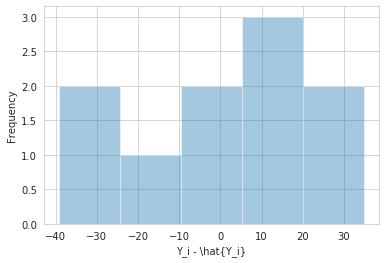

In [8]:
## Plot the residuals
residuals = degrees - (a+b*cheese)

sns.distplot(residuals, kde=False, bins=5)
plt.xlabel("Y_i - \hat{Y_i}")
plt.ylabel("Frequency")
plt.savefig("Lecture20_residuals_distplot.pdf")

In [13]:
## Calculate SS_* values and MS_residual

Y_hats = (a+b*cheese)

SS_regress = np.sum((Y_hats-y_mean)**2)
SS_resid = np.sum((degrees-Y_hats)**2)
SS_total = SS_regress + SS_resid

print(f'SS_regress = {SS_regress}, SS_resid = {SS_resid}, SS_total={SS_total}')

MS_resid = (np.sum(residuals**2))/(cheese.shape[0]-2)
print(f"MS_resid={MS_resid}")

SS_regress = 65065.22746585728, SS_resid = 5734.372534142642, SS_total=70799.59999999992
MS_resid=716.7965667678302


In [10]:
SS_resid/(cheese.shape[0]-2)

716.7965667678302

In [11]:
R_sqrd = SS_regress/SS_total
print(R_sqrd)

0.9190055800577596


In [12]:
SE_b = np.sqrt(MS_resid/np.sum((cheese - x_mean)**2))
print(SE_b)

16.490174648168466


In [14]:
from sklearn.metrics import mean_squared_error

mean_squared_error(degrees, Y_hats)

573.4372534142642